# Pseudo-Storm Reports 

In [104]:
import xarray as xr
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

## Create the New Data

In [84]:
#open the pandas dataframe
jun91 = pd.read_csv('storm_modes__1991_06.csv')
new_df = jun91
new_df

,Unnamed: 0,Index,x,y,Filename,Time,Mode
0,0,0,835,445,06011991_T01_0id.npy,1991-06-01T01:00:00.000000000,tropical
1,1,10,842,451,06011991_T01_10id.npy,1991-06-01T01:00:00.000000000,tropical
2,2,11,843,451,06011991_T01_11id.npy,1991-06-01T01:00:00.000000000,qlcs
3,3,12,840,452,06011991_T01_12id.npy,1991-06-01T01:00:00.000000000,tropical
4,4,13,841,452,06011991_T01_13id.npy,1991-06-01T01:00:00.000000000,tropical
...,...,...,...,...,...,...,...
587,587,662,801,639,06301991_T22_662id.npy,1991-06-30T22:00:00.000000000,qlcs
588,588,663,802,639,06301991_T22_663id.npy,1991-06-30T22:00:00.000000000,qlcs
589,589,664,801,640,06301991_T22_664id.npy,1991-06-30T22:00:00.000000000,qlcs
590,590,665,802,640,06301991_T22_665id.npy,1991-06-30T22:00:00.000000000,qlcs


In [90]:
#create lists to append values to
refc = []
gust = []
heli = []
hail = []
prec = []

#each row takes about 12 seconds to run through
#iterate through the pandas dataframe
for rid, row in jun91.iterrows():
        
    #logic statments for the folder name
    if int(row.Time[5:7]) < 10:
        folder = f'{int(row.Time[:4])-1}-{int(row.Time[:4])}'

    else:
        folder = f'{int(row.Time[:4])}-{int(row.Time[:4]+1)}'

    #open and subset the datasets    
    ds = xr.open_mfdataset(f'/home/scratch/ahaberlie/AFWA_*/HIST/{folder}/*{row.Time[:10]}*.nc')
    ds = ds.sel(Time = row.Time, south_north=row.y, west_east=row.x)
    
    #append the values
    refc.append(ds.REFD_COM.values)
    gust.append(ds.WSPD10MAX.values)
    heli.append(ds.UP_HELI_MAX.values)
    hail.append(ds.HAIL_MAX2D.values)
    prec.append(ds.AFWA_TOTPRECIP.values)

In [93]:
#add the columns to the new dataframe
new_df['Reflectivity'] = refc
new_df['Wind_Gust'] = gust
new_df['Updraft_Helicity'] = heli
new_df['Hail_Max'] = hail
new_df['Total_Precip'] = prec
new_df

,Unnamed: 0,Index,x,y,Filename,Time,Mode,Reflectivity,Wind_Gust,Updraft_Helicity,Hail_Max,Total_Precip
0,0,0,835,445,06011991_T01_0id.npy,1991-06-01T01:00:00.000000000,tropical,56.438183,9.050697,77.697334,0.0381041,1.72052
1,1,10,842,451,06011991_T01_10id.npy,1991-06-01T01:00:00.000000000,tropical,63.55462,11.583337,126.14696,0.042890705,7.1124268
2,2,11,843,451,06011991_T01_11id.npy,1991-06-01T01:00:00.000000000,qlcs,57.13729,4.9717097,115.476585,0.03754147,1.458435
3,3,12,840,452,06011991_T01_12id.npy,1991-06-01T01:00:00.000000000,tropical,51.30462,13.261662,107.82991,0.04240928,26.67981
4,4,13,841,452,06011991_T01_13id.npy,1991-06-01T01:00:00.000000000,tropical,56.467434,13.111317,108.64998,0.041849203,18.923218
...,...,...,...,...,...,...,...,...,...,...,...,...
587,587,662,801,639,06301991_T22_662id.npy,1991-06-30T22:00:00.000000000,qlcs,63.574238,16.107697,92.66933,0.044038597,24.76178
588,588,663,802,639,06301991_T22_663id.npy,1991-06-30T22:00:00.000000000,qlcs,66.4877,15.01565,87.39386,0.043532453,9.941772
589,589,664,801,640,06301991_T22_664id.npy,1991-06-30T22:00:00.000000000,qlcs,62.783073,12.420281,77.62937,0.043081716,26.628418
590,590,665,802,640,06301991_T22_665id.npy,1991-06-30T22:00:00.000000000,qlcs,66.51315,11.105287,75.17802,0.04445748,11.897766


In [94]:
new_df.to_csv('storm_reports_june1991.csv')

## Create Graphs to Visualize Statistics

In [96]:
means = new_df.groupby(['Mode'])['Reflectivity','Wind_Gust','Updraft_Helicity','Hail_Max','Total_Precip'].mean()
means

/tmp/ipykernel_4322/562309694.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  means = new_df.groupby(['Mode'])['Reflectivity','Wind_Gust','Updraft_Helicity','Hail_Max','Total_Precip'].mean()


,Reflectivity,Wind_Gust,Updraft_Helicity,Hail_Max,Total_Precip
Mode,,,,,
isolated_cell,55.980408,11.086655,100.752189,0.040970,4.220945
loosely_clustered_cells,58.632945,16.699320,85.358754,0.043522,11.738848
multiple_isolated_cells,59.609825,15.634583,90.754546,0.041924,12.430005
qlcs,58.231702,17.397499,89.599629,0.041631,15.102790
tightly_clustered_cells,58.168951,17.455477,94.374449,0.041662,11.275740
tropical,58.583492,15.636336,94.542008,0.042335,14.970174


Text(0, 0.5, 'Updraft Helicity Value ($m^2$/$s^2$)')

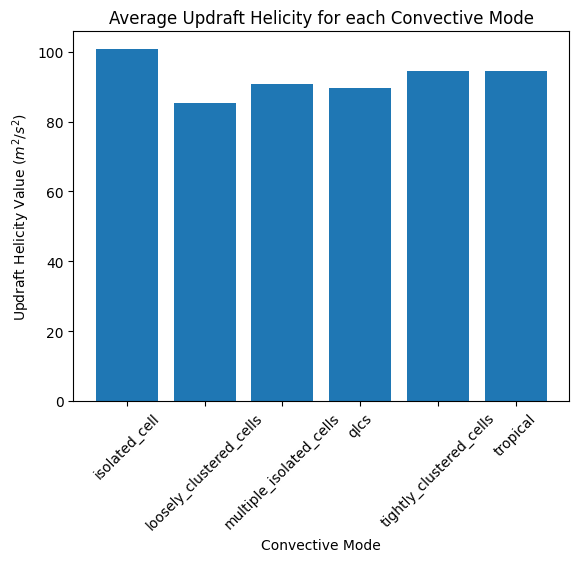

In [115]:
fig, ax = plt.subplots()

ax.bar(
    x=means.index,
    height=means['Updraft_Helicity'].values
)

ax.set_title('Average Updraft Helicity for each Convective Mode')
ax.set_xlabel('Convective Mode')
plt.xticks(rotation = 45)
ax.set_ylabel('Updraft Helicity Value ($m^2$/$s^2$)')